In [7]:
import torch
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
10 ** (-5)

1e-05

In [8]:
fc = torch.nn.Linear(100, 100)

In [9]:
fc.in_features

100

In [10]:
from omegaconf import OmegaConf

In [11]:
OmegaConf.load('configs/apn_CUB.yaml')

{'MODEL': {'NAME': 'apn', 'DIST': 'dot', 'BACKBONE': {'NAME': 'resnet101', 'CKPT_PATH': 'checkpoints/resnet101_ft_CUB.pt'}, 'IMAGE_SIZE': 448, 'LOSSES': {'L_CLS': 1, 'L_REG': 0.1, 'L_CPT': 0.2}}, 'DATASET': {'NAME': 'CUB', 'NUM_CLASSES': 200, 'NUM_ATTRS': 312, 'ROOT_DIR': 'datasets'}, 'OPTIM': {'LR': 0.0001, 'EPOCHS': 30, 'BATCH_SIZE': 16, 'STEP_SIZE': 10, 'BETAS': '(0.5, 0.999)', 'GAMMA': 0.5}, 'SEED': 42}

In [23]:
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [24]:
net = resnet101(weights=ResNet101_Weights.DEFAULT)

In [34]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
extractor = create_feature_extractor(net, {'layer4.2.relu_2': 'features'})
avg_pool = torch.nn.AdaptiveAvgPool2d(output_size=(1,1))

In [36]:
avg_pool(extractor(torch.randn(4, 3, 224, 224))['features']).shape

torch.Size([4, 2048, 1, 1])

In [30]:
get_graph_node_names(net)

(['x',
  'conv1',
  'bn1',
  'relu',
  'maxpool',
  'layer1.0.conv1',
  'layer1.0.bn1',
  'layer1.0.relu',
  'layer1.0.conv2',
  'layer1.0.bn2',
  'layer1.0.relu_1',
  'layer1.0.conv3',
  'layer1.0.bn3',
  'layer1.0.downsample.0',
  'layer1.0.downsample.1',
  'layer1.0.add',
  'layer1.0.relu_2',
  'layer1.1.conv1',
  'layer1.1.bn1',
  'layer1.1.relu',
  'layer1.1.conv2',
  'layer1.1.bn2',
  'layer1.1.relu_1',
  'layer1.1.conv3',
  'layer1.1.bn3',
  'layer1.1.add',
  'layer1.1.relu_2',
  'layer1.2.conv1',
  'layer1.2.bn1',
  'layer1.2.relu',
  'layer1.2.conv2',
  'layer1.2.bn2',
  'layer1.2.relu_1',
  'layer1.2.conv3',
  'layer1.2.bn3',
  'layer1.2.add',
  'layer1.2.relu_2',
  'layer2.0.conv1',
  'layer2.0.bn1',
  'layer2.0.relu',
  'layer2.0.conv2',
  'layer2.0.bn2',
  'layer2.0.relu_1',
  'layer2.0.conv3',
  'layer2.0.bn3',
  'layer2.0.downsample.0',
  'layer2.0.downsample.1',
  'layer2.0.add',
  'layer2.0.relu_2',
  'layer2.1.conv1',
  'layer2.1.bn1',
  'layer2.1.relu',
  'layer2.1.c

In [4]:
test_dict = {'a': 1}
test_omegaconf = OmegaConf.create(test_dict)


In [9]:
test_omegaconf.get('b', 1)

1

In [2]:
mat = scipy.io.loadmat('att_splits.mat')

In [11]:
tpami_idxs = mat['allClassLabelSet']

In [21]:
tpami_idxs.squeeze()

array([  2,   3,   5,   7,  10,  11,  12,  13,  15,  16,  17,  18,  19,
        20,  21,  22,  24,  25,  26,  27,  28,  30,  32,  39,  40,  41,
        42,  44,  45,  46,  47,  48,  50,  52,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  67,  68,  69,  70,  71,  73,
        74,  75,  76,  77,  78,  80,  81,  82,  85,  87,  88,  89,  90,
        92,  93,  94,  97,  99, 100, 104, 105, 106, 107, 108, 109, 110,
       111, 113, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127,
       128, 129, 131, 132, 133, 134, 136, 137, 139, 140, 141, 142, 143,
       144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158,
       159, 160, 161, 162, 164, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 181, 182, 184, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 198, 199, 200,   1,   4,   6,   8,   9,  14,
        23,  29,  31,  33,  34,  35,  36,  37,  38,  43,  49,  51,  53,
        66,  72,  79,  83,  84,  86,  91,  95,  96,  98, 101, 10

In [16]:
tpami_attrs = mat['att'].T

In [12]:
SELECTED_CONCEPTS = [1, 4, 6, 7, 10, 14, 15, 20, 21, 23, 25, 29, 30, 35, 36, 38, 40, 44, 45,
                     50, 51, 53, 54, 56, 57, 59, 63, 64, 69, 70, 72, 75, 80, 84, 90, 91, 93,
                     99, 101, 106, 110, 111, 116, 117, 119, 125, 126, 131, 132, 134, 145, 149,
                     151, 152, 153, 157, 158, 163, 164, 168, 172, 178, 179, 181, 183, 187, 188,
                     193, 194, 196, 198, 202, 203, 208, 209, 211, 212, 213, 218, 220, 221, 225,
                     235, 236, 238, 239, 240, 242, 243, 244, 249, 253, 254, 259, 260, 262, 268,
                     274, 277, 283, 289, 292, 293, 294, 298, 299, 304, 305, 308, 309, 310, 311]

In [13]:
class_attr_lables = np.loadtxt('datasets/CUB/CUB_200_2011/attributes/class_attribute_labels_continuous.txt')
class_attr_lables = class_attr_lables / 100
class_attr_lables_selected = class_attr_lables[:, SELECTED_CONCEPTS]

class_attr_lables_norm = class_attr_lables / np.linalg.norm(class_attr_lables, axis=-1, keepdims=True)
class_attr_lables_selected_norm = class_attr_lables_selected / np.linalg.norm(class_attr_lables_selected, axis=-1, keepdims=True)

In [22]:
class_attr_lables_norm[tpami_idxs - 1]

array([[[0.0106384 , 0.0106384 , 0.00709227, ..., 0.00918617,
         0.02526198, 0.02066889]],

       [[0.        , 0.01133243, 0.00944369, ..., 0.00266542,
         0.02132333, 0.05863916]],

       [[0.        , 0.        , 0.00742474, ..., 0.        ,
         0.00885258, 0.01770516]],

       ...,

       [[0.        , 0.00334966, 0.        , ..., 0.00556558,
         0.        , 0.15027069]],

       [[0.        , 0.11184146, 0.        , ..., 0.08207164,
         0.05836206, 0.01823814]],

       [[0.04378019, 0.02814441, 0.        , ..., 0.06022509,
         0.07695428, 0.06189801]]])

In [23]:
tpami_attrs

array([[0.0106384 , 0.0106384 , 0.00709227, ..., 0.00918617, 0.02526198,
        0.02066889],
       [0.        , 0.01133243, 0.00944369, ..., 0.00266542, 0.02132333,
        0.05863916],
       [0.        , 0.        , 0.00742474, ..., 0.        , 0.00885258,
        0.01770516],
       ...,
       [0.        , 0.00334966, 0.        , ..., 0.00556558, 0.        ,
        0.15027069],
       [0.        , 0.11184146, 0.        , ..., 0.08207164, 0.05836206,
        0.01823814],
       [0.04378019, 0.02814441, 0.        , ..., 0.06022509, 0.07695428,
        0.06189801]])

In [32]:
dot_products = class_attr_lables @ class_attr_lables.T
dot_products_selected = class_attr_lables_selected @ class_attr_lables_selected.T

dot_products_norm = class_attr_lables_norm @ class_attr_lables_norm.T
dot_products_selected_norm = class_attr_lables_selected_norm @ class_attr_lables_selected_norm.T

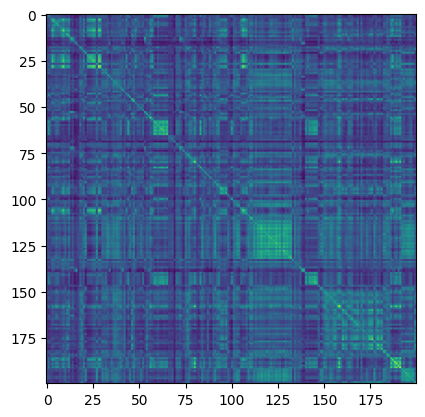

In [30]:
plt.imshow(dot_products)

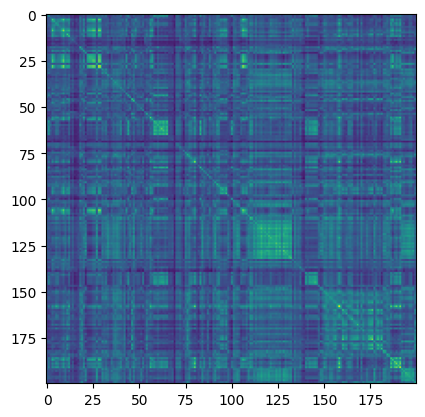

In [31]:
plt.imshow(dot_products_selected)

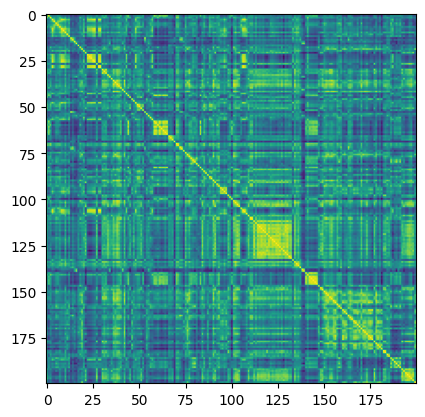

In [33]:
plt.imshow(dot_products_norm)

In [35]:
np.all(np.argmax(dot_products_norm, axis=-1) == np.arange(200))

True

In [25]:
np.argmax(dot_products_selected, axis=-1)

array([ 45,   1,  60,  28,   4, 158,   6,  28,  28,   9,   9,  11,  12,
        53,  14, 176,  12, 126,  18,  19,  56, 128,  28,  28,  28,  28,
        28,  27,  28,  28,  30,  77,  32,  33, 116,  35,  36,  37, 116,
       158, 191,   9, 151,  28,  63,  45,  46,  47,  28,  49, 158, 128,
       158,  53,  54, 184,  56,  28,  65,  65,  60,  65,  62,  63,  65,
        65, 197, 158, 196,   9, 191, 158, 158,  18,  74,  75,  76,  77,
        78,  80,  80,  78,  82,  83,  84, 191,  86,  87, 158, 158, 110,
       124,  92, 191,  97,  95,   9,  97, 182, 116,  62, 101, 129, 124,
       124, 105,  28,  28,   9, 109, 110, 110, 116, 113, 116, 116, 116,
       124, 116, 128, 120, 121, 124, 120, 124, 124, 126, 124, 128, 129,
       116, 131, 132,  28, 129,   9, 116, 137,   9,   9, 145,  28, 145,
       145, 145, 145, 145, 147, 128, 124, 191, 151, 152, 153, 154, 155,
       176, 158, 158, 158, 176, 168, 162, 158, 158, 165, 179, 179, 168,
       171, 158, 171, 176, 124, 176, 176, 176, 177, 178, 179, 18

In [36]:
np.all(np.argmax(dot_products_selected_norm, axis=-1) == np.arange(200))

True

In [42]:
class_attr_lables_norm

array([[0.        , 0.00881062, 0.00440531, ..., 0.01616591, 0.06466363,
        0.05927499],
       [0.0106384 , 0.0106384 , 0.00709227, ..., 0.00918617, 0.02526198,
        0.02066889],
       [0.        , 0.01133243, 0.00944369, ..., 0.00266542, 0.02132333,
        0.05863916],
       ...,
       [0.0262006 , 0.08939028, 0.        , ..., 0.10786413, 0.04576054,
        0.04412624],
       [0.        , 0.00487792, 0.        , ..., 0.08129862, 0.07804668,
        0.0471532 ],
       [0.        , 0.01967131, 0.        , ..., 0.00725401, 0.02538904,
        0.07072661]])

In [44]:
attrs = np.loadtxt('datasets/CUB/CUB_200_2011/attributes/class_attribute_labels_continuous.txt')

In [52]:
class_attr_lables_norm.shape

(200, 312)

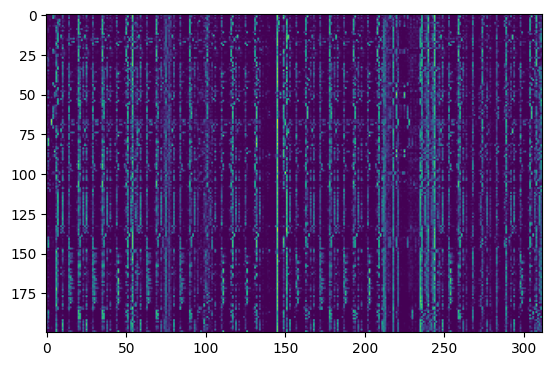

In [50]:
plt.imshow(class_attr_lables_norm)